##### 자료출처 : https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html#

torch geometric 설치

In [1]:
import torch

try:
    import torch_geometric
except ModuleNotFoundError:
    # Installing torch geometric packages with specific CUDA+PyTorch version.
    # See https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html for details
    TORCH = torch.__version__.split('+')[0]
    CUDA = 'cu' + torch.version.cuda.replace('.','')

    !pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
    !pip install torch-geometric

c:\Users\chang\Anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Data Handling of Graphs

In [6]:
import torch
import torch_geometric
from torch_geometric.data import Data

In [3]:
# 1. 그래프 만들기

# 노드 만들기 
x = torch.tensor([[-3],[0],[3],[5],[-2]], dtype=torch.float) # 순서대로 Node(0,1,2,..) 번호가 부여된다.          

# 엣지 만들기
edge_index = torch.tensor([[0,1,1,2,4],
                           [1,0,2,1,4]], dtype=torch.long) # 위 부여된 노드 번호대로 edge를 연결한다.
print("start node :",edge_index[0])
print("end node :",edge_index[1])

graph = Data(x=x, edge_index=edge_index)
print(graph,'\n')
print("※ x의 좌측값이 노드개수, edge_index의 우측값이 엣지개수 입니다. ※")

start node : tensor([0, 1, 1, 2, 4])
end node : tensor([1, 0, 2, 1, 4])
Data(x=[5, 1], edge_index=[2, 5]) 

※ x의 좌측값이 노드개수, edge_index의 우측값이 엣지개수 입니다. ※


In [7]:
import matplotlib.pyplot as plt
import networkx as nx

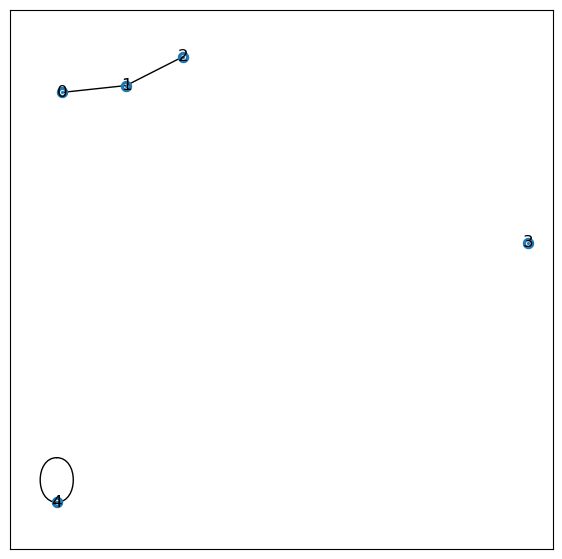

In [19]:
plt.figure(figsize=(7, 7))

# torch_geometric.data.Data : homogeneous graph(동종그래프)의 인스턴스를 생성
cora = torch_geometric.data.Data(x=graph.x, edge_index=graph.edge_index)

# torch_geometric.data.Data 인스턴스 --> networkx.Graph 로 변환
g = torch_geometric.utils.to_networkx(cora, to_undirected=True)

# 플로팅 (nx.drwa_networkx 또는 nx.draw)
nx.draw_networkx(g, cmap=plt.get_cmap('jet'),node_size=5,linewidths=6)

In [4]:
# 2. 그래프 형태의 필수 조건을 갖췄는지 확인
# graph.validate(raise_on_error=True)

In [5]:
# 3. 그래프 속성 확인
print("그래프 KEY :",graph.keys)
print("노드 수 :",graph.num_nodes) # 노드 수 
print("엣지 수 :",graph.num_edges) # 엣지 수
print("노드 특징 행렬 :",graph.num_node_features) # 노드의 특징 행렬 ( -1, 0, 1 로 각 1개씩이라 1 리턴)
print("고립 노드 유무 :",graph.has_isolated_nodes()) # 고립된 노드 유무 --> (4번째노드는 연결된 edge가 없음)
print("셀프 루프 유무 :",graph.has_self_loops()) # self loop 존재 유무 --> (5번째노드는 self loop 존재)
print("그래프 방향성 여부 :",graph.is_directed()) # 그래프의 방향성 여부 

그래프 KEY : ['edge_index', 'x']
노드 수 : 5
엣지 수 : 5
노드 특징 행렬 : 1
고립 노드 유무 : True
셀프 루프 유무 : True
그래프 방향성 여부 : False


In [6]:
# 4. graph 객체를 cpu / gpu 변환 가능
device = torch.device('cuda')
graph = graph.to(device)

### 2. Common Benchmark Datasets

In [7]:
from torch_geometric.datasets import TUDataset

graph_dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

# 그래프 속성 확인
print(f"전체 그래프 수 : {len(graph_dataset)}")
for idx,graph in enumerate(graph_dataset):
    print(f"====== {idx}번째 그래프의 특징은 다음과 같습니다. ======")
    print("그래프 KEY :",graph.keys)
    print("노드 수 :",graph.num_nodes) 
    print("엣지 수 :",graph.num_edges) 
    print("노드 특징 행렬 :",graph.num_node_features) 
    print("고립 노드 유무 :",graph.has_isolated_nodes())
    print("셀프 루프 유무 :",graph.has_self_loops()) 
    print("그래프 방향성 여부 :",graph.is_directed())
    break

# 데이터셋 추가 기능
# 1. 학습/검증/테스트 분류가능
train_dataset = graph_dataset[:540]
test_dataset = graph_dataset[540:]

# 2. 셔플가능
train_dataset = train_dataset.shuffle()

전체 그래프 수 : 600
====== 0번째 그래프의 특징은 다음과 같습니다. ======
그래프 KEY : ['edge_index', 'x', 'y']
노드 수 : 37
엣지 수 : 168
노드 특징 행렬 : 3
고립 노드 유무 : False
셀프 루프 유무 : False
그래프 방향성 여부 : False


In [8]:
from torch_geometric.datasets import Planetoid

graph_dataset = Planetoid(root='/tmp/Cora', name='Cora')

# 그래프 속성 확인
print(f"전체 그래프 수 : {len(graph_dataset)}")
for idx,graph in enumerate(graph_dataset):
    print(f"====== {idx}번째 그래프의 특징은 다음과 같습니다. ======")
    print("그래프 KEY :",graph.keys)
    print("노드 수 :",graph.num_nodes) 
    print("엣지 수 :",graph.num_edges) 
    print("노드 특징 행렬 :",graph.num_node_features) 
    print("고립 노드 유무 :",graph.has_isolated_nodes())
    print("셀프 루프 유무 :",graph.has_self_loops()) 
    print("그래프 방향성 여부 :",graph.is_directed())

    print("======= 추가된 특징 =======")
    print("학습되는 노드 수 :", graph.train_mask.sum())
    print("검증되는 노드 수 :", graph.val_mask.sum())
    print("테스트되는 노드 수 :", graph.test_mask.sum())
    break

전체 그래프 수 : 1
====== 0번째 그래프의 특징은 다음과 같습니다. ======
그래프 KEY : ['x', 'y', 'train_mask', 'test_mask', 'edge_index', 'val_mask']
노드 수 : 2708
엣지 수 : 10556
노드 특징 행렬 : 1433
고립 노드 유무 : False
셀프 루프 유무 : False
그래프 방향성 여부 : False
======= 추가된 특징 =======
학습되는 노드 수 : tensor(140)
검증되는 노드 수 : tensor(500)
테스트되는 노드 수 : tensor(1000)


### 3. Mini-batches

In [9]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

graph_dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
print(f"데이터세트 총 길이 : {len(graph_dataset)}","\n")

loader = DataLoader(graph_dataset, batch_size=32, shuffle=True)
print(f"배치 개수 :{len(graph_dataset)/32}","\n")

for idx,batch in enumerate(loader):
    print(f"{idx} : {batch}")
    print(f"배치안 그래프 개수 : {batch.num_graphs}","\n")
    break

데이터세트 총 길이 : 600 

배치 개수 :18.75 

0 : DataBatch(edge_index=[2, 4228], x=[1151, 21], y=[32], batch=[1151], ptr=[33])
배치안 그래프 개수 : 32 



### 4. Data Transforms

In [13]:
# # 17000개의 3D shape point cloud가 담긴 데이터세트 (레이블은 16개의 클래스를 가짐)
# from torch_geometric.datasets import ShapeNet

# shapeNet_dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Motorbike'])